# CNN STRUCTURE
by changing , the convolutions, filters, strides, paddings, nodes, activation functions, dropout , batch normalization

# https://jovian.ai/paulbindass/convolutional-neural-network-world

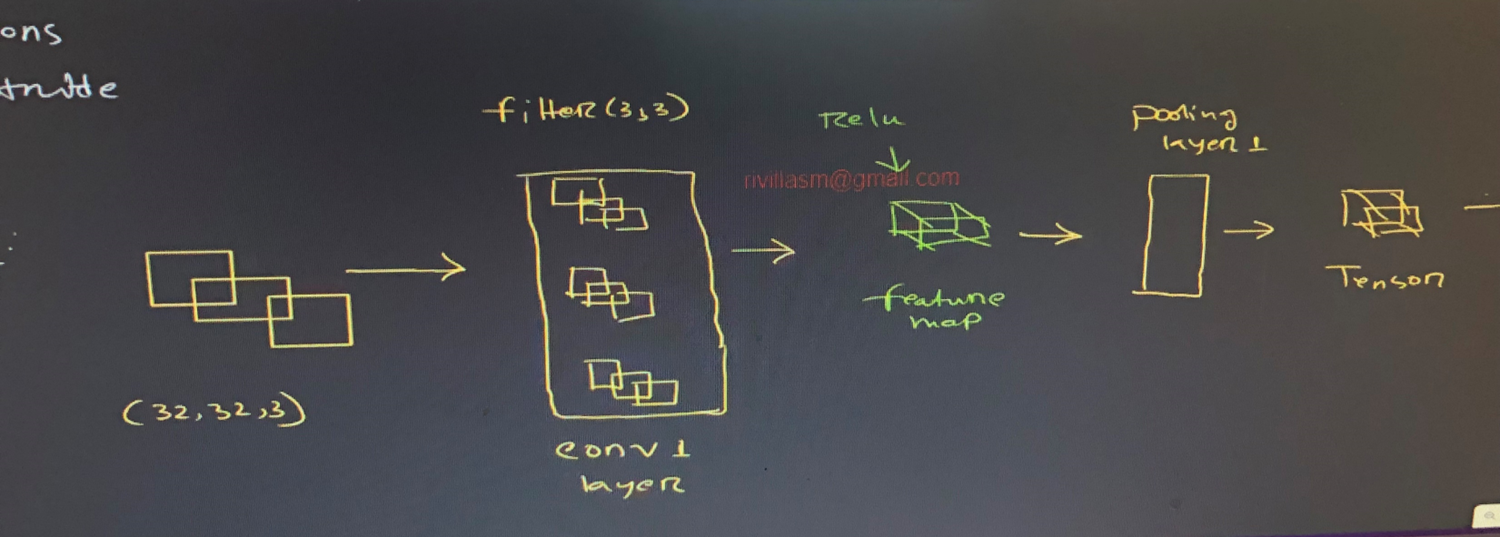

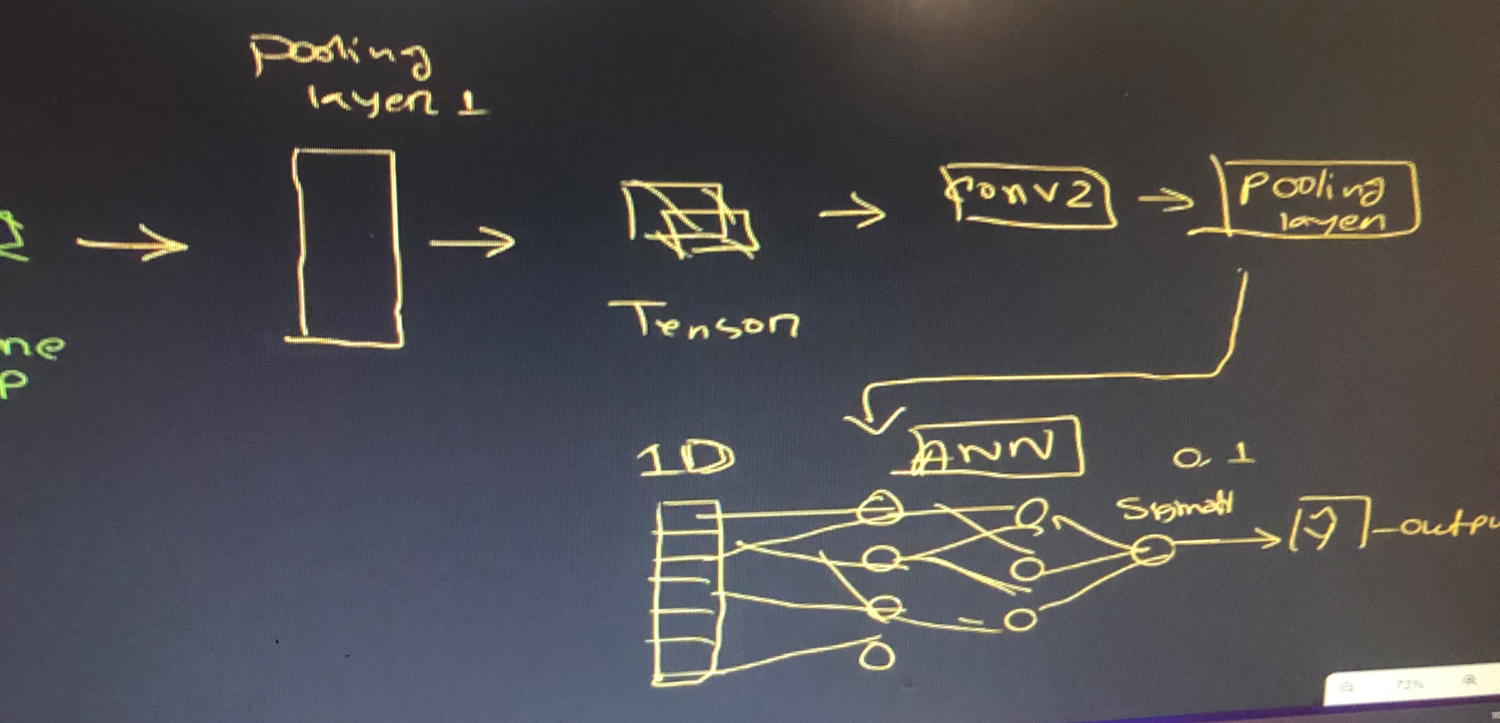

https://image-net.org/

Existing Architectures
* lenet
* alexnet
* vgc net, vgc16, vgc19
* inception -> googlenet
* resnet -> microsoft

* https://keras.io/api/applications/

# LENET-5 first architecture in the field of CNN
    * it is an image classification architecture - paper called "gradient based learning"
    * for postal service us navy - pincode recognizer
    * input size 32x32 at that time, low resolution

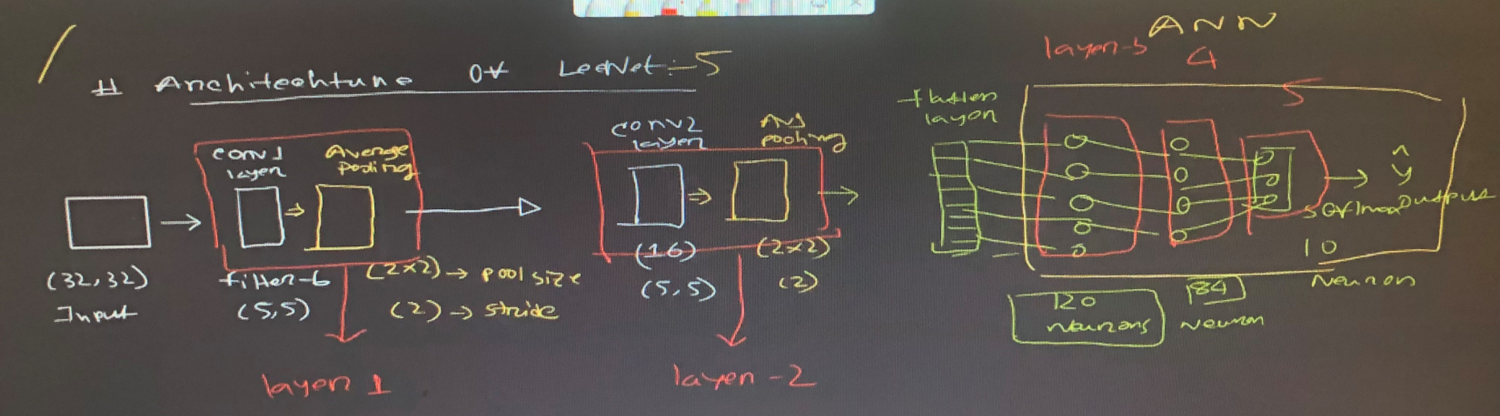

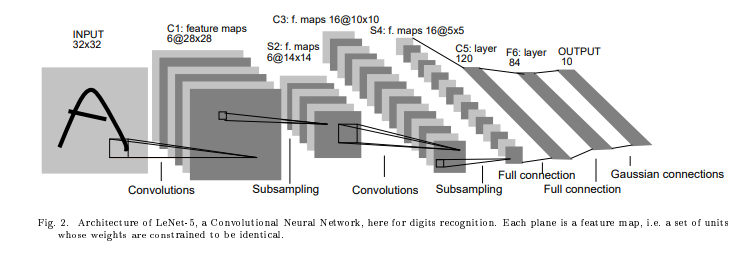

* (CN-F+2P)/S + 1 = (32+2*0-5)/1+1 = 28
    * CONV LAYER 1 (28,28,6)  # 6 FILTERS
* (I-F)/S + 1 * D = (28-2)/2 +1 = 14
    * AVG POOLING (14,14,6)  # 2X2 POOLSIZE, 2 STRIDE
* (CN-F+2P)/S + 1 = (14+2*0-5)/1+1 = 10
    * CONV LAYER 2 (10,10,16)  # 16 FILTERS
* (I-F)/S + 1 * D = (10-2)/2 +1 = 5
    * AVG POOLING (5,5,16)  # 2X2 POOLSIZE, 2 STRIDE

Final parameters
* 5*5*16 goes to the flat layer
* 5*5*16*120 | 120*84 | 84*10
 

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras.models import Sequential

In [11]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [13]:
# reshaping
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)   # you need to add the channel dimension
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)   # you need to add the channel dimension

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [14]:
# Normalize the data
x_train=x_train/255
x_test=x_test/255

In [17]:
# one hot encoding to get a format like [0,0,0,0,1,0,0,0,0,0] for numbers from 0 to 9.
print(f"y_min:{min(y_train)}, y_max:{max(y_train)}")

print(" before encoding:", y_train[0])
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
print(" after encoding:", y_train[0])

y_min:0, y_max:9
 before encoding: 5
 after encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Model Architecture

In [19]:
model=Sequential()                    # input layer goes in the sequential automatically

# Layer1
model.add(Conv2D(6,                   # number of filters
                 kernel_size=(5,5),   # filter dimension
                 padding="valid",     # valid means no padding
                 activation="tanh",   # nowadays we use relu
                 input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),
                           strides=2,
                           padding="valid"))

# Layer2
model.add(Conv2D(16,                   # number of filters
                 kernel_size=(5,5),   # filter dimension
                 padding="valid",     # valid means no padding
                 activation="tanh"))   # nowadays we use relu
                 
model.add(AveragePooling2D(pool_size=(2,2),
                           strides=2,
                           padding="valid"))

# flatten layer
model.add(Flatten())

# ANN
model.add(Dense(120, activation="tanh"))
model.add(Dense(84, activation="tanh"))
model.add(Dense(10, activation="softmax"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [20]:
model.compile(loss=keras.metrics.categorical_crossentropy,optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
model.fit(x_train,y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 12s 22ms/step - loss: 0.6699 - accuracy: 0.8020 - val_loss: 0.1613 - val_accuracy: 0.9509
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.1509 - accuracy: 0.9544 - val_loss: 0.0985 - val_accuracy: 0.9703
Epoch 3/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0919 - accuracy: 0.9713 - val_loss: 0.0741 - val_accuracy: 0.9772
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0675 - accuracy: 0.9789 - val_loss: 0.0662 - val_accuracy: 0.9793
Epoch 5/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0540 - accuracy: 0.9828 - val_loss: 0.0560 - val_accuracy: 0.9814
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0527 - val_accuracy: 0.9841
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0482 - val_accuracy: 0

In [22]:
score = model.evaluate(x_test, y_test)
print("test loss:",score[0], "\naccuracy:",score[1]) 

313/313 [==============================] - 1s 4ms/step - loss: 0.0462 - accuracy: 0.9863
test loss: 0.046163659542798996 
accuracy: 0.986299991607666


# ALEXNET -     
    * better input image resolution 227x227
    * 

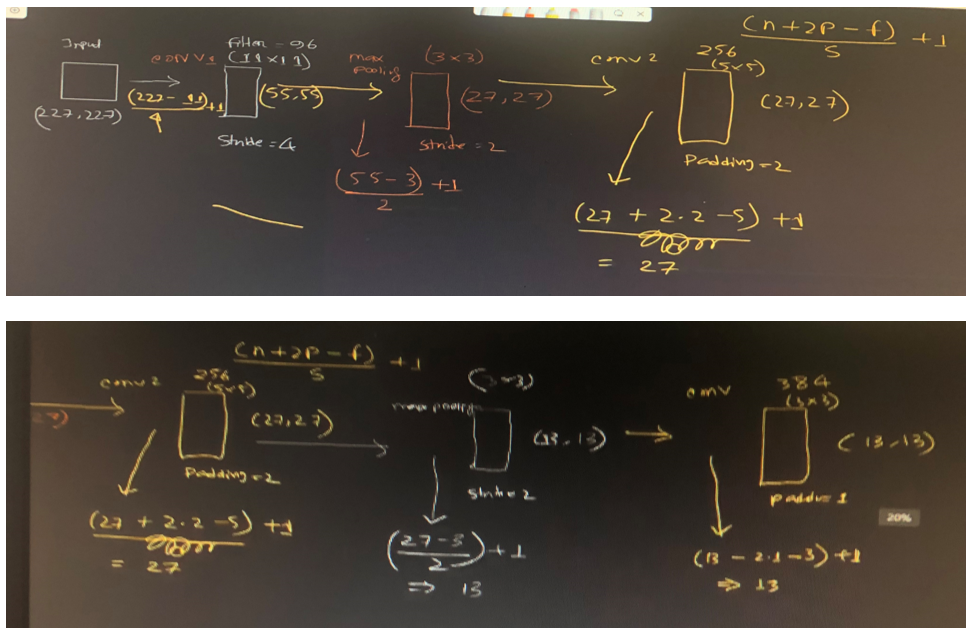

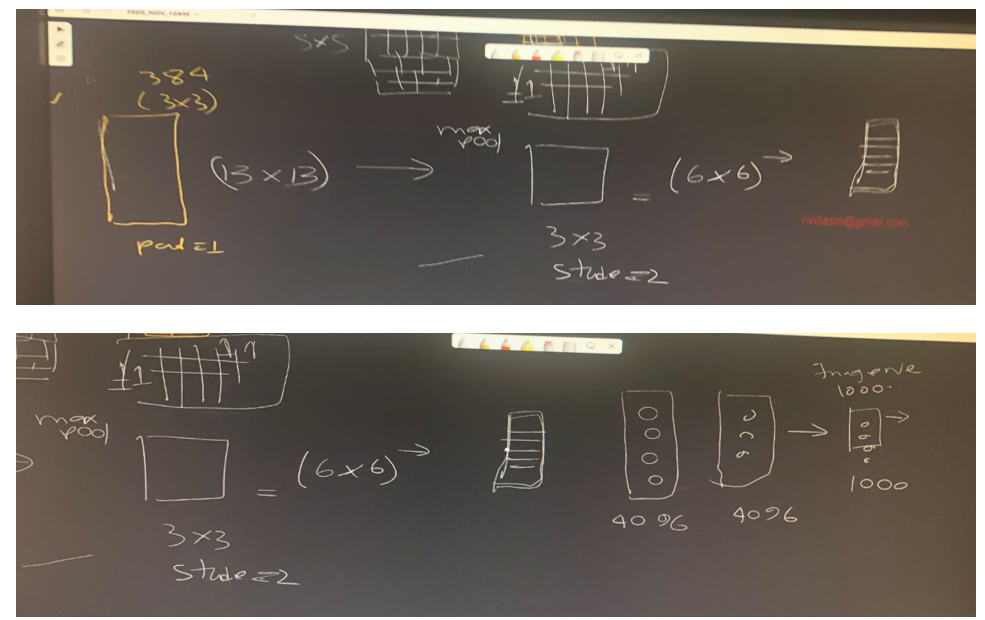

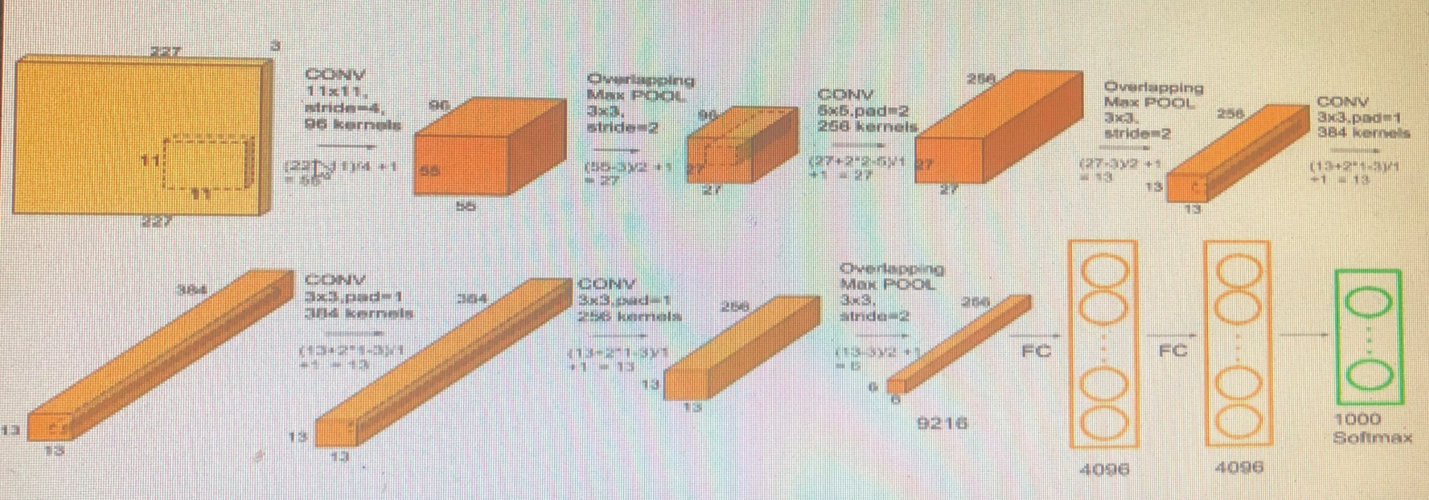

* new things added: CPCPCCCPD
    * 11x11, 5x5 filter
    * maxppoling
    * dropout
    * normalization - best local response 
    * filter size has been increased

In [27]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [29]:
#!pip install tflearn

In [30]:
# get data
import tflearn.datasets.oxflower17 as oxflower17   # 17 classes of flower
x,y=oxflower17.load_data(one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [32]:
x.shape, y.shape

((1360, 224, 224, 3), (1360, 17))

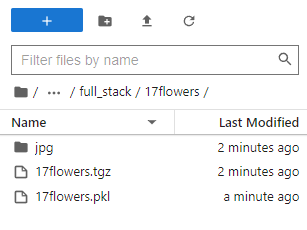 

In [33]:
y   # has been one hot encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
# create sequential model
model=Sequential()                    # input layer goes in the sequential automatically

# 1st convolution layer
# number of filters, filter dimension, "valid" means no padding
model.add(Conv2D(96, kernel_size=(11,11), padding="valid", strides=(4,4), input_shape=(224,224,3)))
model.add(Activation("relu"))
# pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
# Batch normalization before passing it tot the next layer
# it is recommended to perform batch normalization after pooling and not after conv to avoid loosing data
model.add(BatchNormalization())

# 2nd convolution layer
model.add(Conv2D(256, kernel_size=(5,5), padding="same", strides=(1,1)))
model.add(Activation("relu"))
# pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(BatchNormalization())


# 3rd convolutional layer
model.add(Conv2D(384, kernel_size=(3,3), padding="valid", strides=(1,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())


# 4th convolutional layer
model.add(Conv2D(384, kernel_size=(3,3), padding="valid", strides=(1,1)))
model.add(Activation("relu"))
model.add(BatchNormalization())

# 5th convolutional layer
model.add(Conv2D(256, kernel_size=(3,3), padding="valid", strides=(1,1)))
model.add(Activation("relu"))
# pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(BatchNormalization())

# flatten layer
model.add(Flatten())

# ANN 1st Dense layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation("relu"))
# add Dropout to prevent overfitting
model.add(Dropout(0.4))
model.add(BatchNormalization())

# ANN 2nd Dense layer
model.add(Dense(4096))
model.add(Activation("relu"))
# add Dropout to prevent overfitting
model.add(Dropout(0.4))
model.add(BatchNormalization())

# output layer
model.add(Dense(17))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_12 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 256)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 256)      

In [38]:
# compile
opt=tf.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [39]:
#train
model.fit(x, y, batch_size=64, epochs=5, verbose=1, validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/5
1088/1088 [==============================] - ETA: 0s - loss: 8.5119 - acc: 0.1627

C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 58s 53ms/sample - loss: 8.5119 - acc: 0.1627 - val_loss: 697497.6360 - val_acc: 0.0551
Epoch 2/5
1088/1088 [==============================] - 51s 47ms/sample - loss: 5.2940 - acc: 0.2059 - val_loss: 33566.8706 - val_acc: 0.0441
Epoch 3/5
1088/1088 [==============================] - 55s 50ms/sample - loss: 4.4142 - acc: 0.2445 - val_loss: 3948.0172 - val_acc: 0.0441
Epoch 4/5
1088/1088 [==============================] - 54s 50ms/sample - loss: 4.3380 - acc: 0.2665 - val_loss: 1287.5871 - val_acc: 0.0441
Epoch 5/5
1088/1088 [==============================] - 55s 51ms/sample - loss: 4.1896 - acc: 0.2739 - val_loss: 964.2436 - val_acc: 0.0478
